# Purpose 

The main purpose of this notebook is to do the IBM's Data Science Capstone Project

# Attribute Information 

**OBJECTID** 

ESRI unique identifier 

**SHAPE**

ESRI geometry field

**INCKEY**

A unique key for the incident

**COLDETKEY**

Secondary key for the incident

**ADDRTYPE**

Collision address type:
• Alley
• Block
• Intersection

**INTKEY**

Key that corresponds to the intersection associated with a collision

**LOCATION**

Description of the general location of the collision

**EXCEPTRSNCODE**

**EXCEPTRSNDESC**

**SEVERITYCODE**

A code that corresponds to the severity of the collision:
• 3—fatality
• 2b—serious injury
• 2—injury
• 1—prop damage
• 0—unknown

**SEVERITYDESC**

A detailed description of the severity of the collision

**COLLISIONTYPE**

Collision type

**PERSONCOUNT**

The total number of people involved in the collision

**PEDCOUNT**

The number of pedestrians involved in the collision. This is entered by the state.

**PEDCYLCOUNT**

The number of bicycles involved in the collision. This is entered by the state.

**VEHCOUNT**

The number of vehicles involved in the collision. This is entered by the state.

**INJURIES**

The number of total injuries in the collision. This is entered by the state.

**SERIOUSINJURIES**

The number of serious injuries in the collision. This is entered by the state.

**FATALITIES**

The number of fatalities in the collision. This is entered by the state

**INCDATE**

The date of the incident.

**INCDTTM**

The date and time of the incident.

**JUNCTIONTYPE**

Category of junction at which collision took place

**SDOT_COLCODE**

A code given to the collision by SDOT.

**SDOT_COLDESC**

A description of the collision corresponding to the collision code.

**INATTENTIONIND**

Whether or not collision was due to inattention. (Y/N)

**UNDERINFL**

Whether or not a driver involved was under the influence of drugs or alcohol.

**WEATHER**

A description of the weather conditions during the time of the collision.

**ROADCOND**

The condition of the road during the collision.

**LIGHTCOND**

The light conditions during the collision.

**PEDROWNOTGRNT**

Whether or not the pedestrian right of way was not granted. (Y/N)

**SDOTCOLNUM**

A number given to the collision by SDOT.

**SPEEDING**

Whether or not speeding was a factor in the collision. (Y/N)

**ST_COLCODE**

A code provided by the state that describes the collision. For more information about these codes, please see the [State Collision Code Dictionary](https://www.seattle.gov/Documents/Departments/SDOT/GIS/Collisions_OD.pdf).

**ST_COLDESC**

A description that corresponds to the state’s coding designation.

**SEGLANEKEY**

A key for the lane segment in which the collision occurred.

**CROSSWAKKEY**

A key for the crosswalk at which the collision occurred.

**HITPARKEDCAR**

Whether or not the collision involved hitting a parked car. (Y/N)

In [40]:
import pandas as pd 
import numpy as np 

In [41]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


In [42]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('Collisions.csv')
df.head(10)

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.339735,47.625393,1,333240,334740,3851889,Unmatched,Intersection,28743.0,9TH AVE N AND ROY ST,,NaN,2,Injury Collision,NaN,2,0,0,0,2,0,0,2020/08/10 00:00:00+00,8/10/2020,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,N
1,-122.326712,47.546101,2,333317,334817,3834541,Unmatched,Block,NaN,S MICHIGAN ST BETWEEN 5TH PL S AND 6TH AVE S,,NaN,2,Injury Collision,NaN,3,0,0,0,1,0,0,2020/08/14 00:00:00+00,8/14/2020,Mid-Block (not related to intersection),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,N
2,-122.329062,47.586170,3,1367,1367,3671783,Matched,Intersection,31348.0,4TH AVE S AND S HOLGATE ST,,NaN,1,Property Damage Only Collision,Rear Ended,2,0,0,2,0,0,0,2013/04/02 00:00:00+00,4/2/2013 1:25:00 PM,At Intersection (intersection related),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,13,From same direction - both going straight - bo...,0,0,N
3,-122.337871,47.606478,4,1189,1189,3548948,Matched,Block,NaN,1ST AVE BETWEEN SENECA ST AND UNIVERSITY ST,,NaN,1,Property Damage Only Collision,Sideswipe,8,0,0,2,0,0,0,2013/03/30 00:00:00+00,3/30/2013 6:20:00 PM,Mid-Block (not related to intersection),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,11,From same direction - both going straight - bo...,0,0,N
4,-122.380021,47.688726,5,30400,30400,04046023,Unmatched,Intersection,23863.0,18TH AVE NW AND NW 83RD ST,NaN,NaN,0,Unknown,NaN,0,0,0,0,0,0,0,2004/02/15 00:00:00+00,2/15/2004,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,NaN,NaN,NaN,NaN,NaN,4046023.0,NaN,NaN,NaN,0,0,N
5,-122.328913,47.613466,6,1290,1290,3581633,Matched,Intersection,29878.0,BOREN AVE AND PIKE ST,,NaN,2,Injury Collision,Cycles,3,0,1,1,1,0,0,2013/03/29 00:00:00+00,3/29/2013 11:53:00 AM,At Intersection (intersection related),18.0,"MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END A...",NaN,N,Clear,Dry,Unknown,Y,NaN,NaN,45,Vehicle - Pedalcyclist,25242,0,N
6,-122.374417,47.519289,7,333232,334732,EA51834,Unmatched,Block,NaN,32ND AVE SW BETWEEN SW BARTON ST AND SW ROXBUR...,,NaN,1,Property Damage Only Collision,NaN,1,0,0,0,0,0,0,2020/08/01 00:00:00+00,8/1/2020,Mid-Block (not related to intersection),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,N
7,-122.290656,47.688440,8,333071,334571,3854919,Matched,Intersection,24886.0,35TH AVE NE AND NE 82ND ST,,NaN,1,Property Damage Only Collision,Other,1,0,0,1,0,0,0,2020/07/11 00:00:00+00,7/11/2020 11:45:00 PM,At Intersection (intersection related),28.0,MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT,NaN,N,Clear,Dry,Dark - Street Lights On,NaN,NaN,Y,50,Fixed object,0,0,N
8,-122.324197,47.605786,9,332577,334077,EA40991,Matched,Block,NaN,JAMES ST BETWEEN 9TH AVE AND TERRY AVE,,NaN,1,Property Damage Only Collision,Rear Ended,2,0,0,2,0,0,0,2020/05/22 00:00:00+00,5/22/2020 3:41:00 PM,Mid-Block (not related to intersection),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,13,From same direction - both going straight - bo...,0,0,N
9,-122.302199,47.583656,10,332862,334362,3834528,Unmatched,Intersection,31563.0,RAINIER AVE S AND S WALKER ST,,NaN,2,Injury Collision,NaN,2,0,0,0,1,0,0,2020/07/21 00:00:00+00,7/21/2020,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,N


In [43]:
# Separating months and years
months = []
years = []
for i in range(df.shape[0]):
    months.append(int(df.INCDATE[i].split('/')[1])) 
    years.append(int(df.INCDATE[i].split('/')[0]))
df['months'] = months
df['years'] = years
df.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,months,years
0,-122.339735,47.625393,1,333240,334740,3851889,Unmatched,Intersection,28743.0,9TH AVE N AND ROY ST,,NaN,2,Injury Collision,NaN,2,0,0,0,2,0,0,2020/08/10 00:00:00+00,8/10/2020,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,N,8,2020
1,-122.326712,47.546101,2,333317,334817,3834541,Unmatched,Block,NaN,S MICHIGAN ST BETWEEN 5TH PL S AND 6TH AVE S,,NaN,2,Injury Collision,NaN,3,0,0,0,1,0,0,2020/08/14 00:00:00+00,8/14/2020,Mid-Block (not related to intersection),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,N,8,2020
2,-122.329062,47.586170,3,1367,1367,3671783,Matched,Intersection,31348.0,4TH AVE S AND S HOLGATE ST,,NaN,1,Property Damage Only Collision,Rear Ended,2,0,0,2,0,0,0,2013/04/02 00:00:00+00,4/2/2013 1:25:00 PM,At Intersection (intersection related),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,13,From same direction - both going straight - bo...,0,0,N,4,2013
3,-122.337871,47.606478,4,1189,1189,3548948,Matched,Block,NaN,1ST AVE BETWEEN SENECA ST AND UNIVERSITY ST,,NaN,1,Property Damage Only Collision,Sideswipe,8,0,0,2,0,0,0,2013/03/30 00:00:00+00,3/30/2013 6:20:00 PM,Mid-Block (not related to intersection),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,11,From same direction - both going straight - bo...,0,0,N,3,2013
4,-122.380021,47.688726,5,30400,30400,04046023,Unmatched,Intersection,23863.0,18TH AVE NW AND NW 83RD ST,NaN,NaN,0,Unknown,NaN,0,0,0,0,0,0,0,2004/02/15 00:00:00+00,2/15/2004,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,NaN,NaN,NaN,NaN,NaN,4046023.0,NaN,NaN,NaN,0,0,N,2,2004


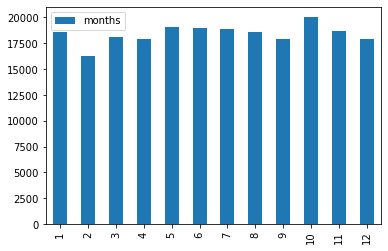

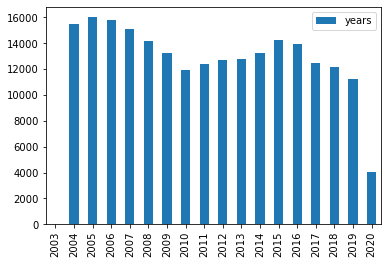

In [44]:
# Check if any particular months have more accident compared to others
import matplotlib.pyplot as plt 

month_df = pd.DataFrame(df.months.value_counts())
year_df = pd.DataFrame(df.years.value_counts())

month_df.sort_index().plot(kind='bar')
year_df.sort_index().plot(kind='bar')


In [45]:
month_df

,months
10,20051
5,19070
6,19001
7,18858
11,18654
8,18568
1,18568
3,18156
4,17931
12,17930


In [46]:
df.JUNCTIONTYPE.unique()

array(['At Intersection (intersection related)',
       'Mid-Block (not related to intersection)', 'Driveway Junction',
       'Mid-Block (but intersection related)',
       'At Intersection (but not related to intersection)', nan,
       'Ramp Junction', 'Unknown'], dtype=object)

## Attributes that will be used 

#### 'ADDRTYPE','months, 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING', 'HITPARKEDCAR', 'SEVERITYCODE'

**Reason why I dropped INATTENTIONIND and PEDROWNOTGRNT**

INATTENTIONIND and PEDROWNOTGRNT mean whether or not collision was due to inattention(Y/N) and whether or not the pedestrian right of way was not granted (Y/N), respsticely. Although those two qualitative data seem very valuable to the prediction, I had to let go of those because they have too many NaN values (e.g. after dropping all NaN values with INAATENTIONIND and PEDROWNOTGRNT, I was left with **3** rows of data). 

In [47]:
df.columns
features = ['ADDRTYPE', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING', 'HITPARKEDCAR'
            ,'months', 'SEVERITYCODE']

In [48]:
for col in features:
    print(col)
    print(df[col].unique())
    print('')

ADDRTYPE
['Intersection' 'Block' nan 'Alley']

UNDERINFL
[nan 'N' '0' '1' 'Y']

WEATHER
[nan 'Clear' 'Raining' 'Overcast' 'Unknown' 'Other' 'Snowing'
 'Partly Cloudy' 'Fog/Smog/Smoke' 'Sleet/Hail/Freezing Rain'
 'Blowing Sand/Dirt' 'Severe Crosswind' 'Blowing Snow']

ROADCOND
[nan 'Dry' 'Wet' 'Unknown' 'Snow/Slush' 'Ice' 'Other' 'Standing Water'
 'Oil' 'Sand/Mud/Dirt']

LIGHTCOND
[nan 'Daylight' 'Unknown' 'Dark - Street Lights On'
 'Dark - Street Lights Off' 'Dusk' 'Dawn' 'Other'
 'Dark - No Street Lights' 'Dark - Unknown Lighting']

SPEEDING
[nan 'Y']

HITPARKEDCAR
['N' 'Y']

months
[ 8  4  3  2  7  5 12  1  6 11 10  9]

SEVERITYCODE
['2' '1' '0' '2b' '3' nan]



In [49]:
for i in features:
    print(i)
    print(df[i].value_counts())
    print('')

ADDRTYPE
Block           144694
Intersection     71728
Alley              873
Name: ADDRTYPE, dtype: int64

UNDERINFL
N    103393
0     81676
Y      5399
1      4230
Name: UNDERINFL, dtype: int64

WEATHER
Clear                       114301
Raining                      34007
Overcast                     28496
Unknown                      15131
Snowing                        919
Other                          851
Fog/Smog/Smoke                 576
Sleet/Hail/Freezing Rain       116
Blowing Sand/Dirt               56
Severe Crosswind                26
Partly Cloudy                    9
Blowing Snow                     1
Name: WEATHER, dtype: int64

ROADCOND
Dry               128101
Wet                48698
Unknown            15129
Ice                 1231
Snow/Slush          1014
Other                136
Standing Water       119
Sand/Mud/Dirt         77
Oil                   64
Name: ROADCOND, dtype: int64

LIGHTCOND
Daylight                    119094
Dark - Street Lights On      50044
Un

In [50]:
col_df = df[features]
col_df

,ADDRTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,HITPARKEDCAR,months,SEVERITYCODE
0,Intersection,NaN,NaN,NaN,NaN,NaN,N,8,2
1,Block,NaN,NaN,NaN,NaN,NaN,N,8,2
2,Intersection,N,Clear,Dry,Daylight,NaN,N,4,1
3,Block,N,Clear,Dry,Daylight,NaN,N,3,1
4,Intersection,NaN,NaN,NaN,NaN,NaN,N,2,0
...,...,...,...,...,...,...,...,...,...
221001,Intersection,N,Clear,Dry,Dark - Street Lights On,Y,N,5,1
221002,Block,N,Clear,Dry,Dark - Street Lights On,NaN,N,3,1
221003,Block,N,Clear,Dry,Dark - Street Lights On,NaN,N,4,1
221004,Block,N,Clear,Dry,Daylight,NaN,N,3,1


In [51]:
new_df = col_df.dropna(axis=0)

In [52]:
new_df.reset_index(inplace=True)
new_df

,index,ADDRTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,HITPARKEDCAR,months,SEVERITYCODE
0,7,Intersection,N,Clear,Dry,Dark - Street Lights On,Y,N,7,1
1,71,Intersection,0,Raining,Wet,Dark - Street Lights Off,Y,N,11,1
2,125,Intersection,0,Overcast,Wet,Daylight,Y,N,2,1
3,126,Intersection,0,Overcast,Wet,Dawn,Y,N,1,1
4,131,Block,0,Clear,Dry,Daylight,Y,N,8,2
...,...,...,...,...,...,...,...,...,...,...
9825,220925,Block,N,Raining,Wet,Daylight,Y,N,2,1
9826,220943,Block,N,Clear,Dry,Dark - Street Lights On,Y,N,5,1
9827,220986,Block,N,Snowing,Ice,Daylight,Y,N,1,1
9828,221000,Block,N,Clear,Wet,Dark - Street Lights On,Y,N,1,1


In [53]:
# Transform values into 0 or 1 for future use
new_df['UNDERINFL'] = new_df.UNDERINFL.apply(lambda x: 0 if x == 'N' or x == 0 else 1)
new_df['HITPARKEDCAR'] = new_df.HITPARKEDCAR.apply(lambda x: 0 if x == "N" else 1)
new_df['SPEEDING'] = new_df.SPEEDING.apply(lambda x: 1 if x == 'Y' else 0)

<ipython-input-53-d3b6bf0722f6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['UNDERINFL'] = new_df.UNDERINFL.apply(lambda x: 0 if x == 'N' or x == 0 else 1)
<ipython-input-53-d3b6bf0722f6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['HITPARKEDCAR'] = new_df.HITPARKEDCAR.apply(lambda x: 0 if x == "N" else 1)
<ipython-input-53-d3b6bf0722f6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [54]:
new_df

,index,ADDRTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,HITPARKEDCAR,months,SEVERITYCODE
0,7,Intersection,0,Clear,Dry,Dark - Street Lights On,1,0,7,1
1,71,Intersection,1,Raining,Wet,Dark - Street Lights Off,1,0,11,1
2,125,Intersection,1,Overcast,Wet,Daylight,1,0,2,1
3,126,Intersection,1,Overcast,Wet,Dawn,1,0,1,1
4,131,Block,1,Clear,Dry,Daylight,1,0,8,2
...,...,...,...,...,...,...,...,...,...,...
9825,220925,Block,0,Raining,Wet,Daylight,1,0,2,1
9826,220943,Block,0,Clear,Dry,Dark - Street Lights On,1,0,5,1
9827,220986,Block,0,Snowing,Ice,Daylight,1,0,1,1
9828,221000,Block,0,Clear,Wet,Dark - Street Lights On,1,0,1,1


In [55]:
new_df = new_df.drop(columns = 'index')

In [56]:
dummies = pd.get_dummies(new_df[['WEATHER','ROADCOND','ADDRTYPE','LIGHTCOND']])

In [57]:
for value in range(len(new_df)):
    if new_df.SEVERITYCODE[value] == '3':
        new_df.SEVERITYCODE[value] = '4'
    elif new_df.SEVERITYCODE[value] == '2b':
        new_df.SEVERITYCODE[value] = '3'
        

<ipython-input-57-28b21220acd3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.SEVERITYCODE[value] = '3'
<ipython-input-57-28b21220acd3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.SEVERITYCODE[value] = '4'


In [58]:
new_df = dummies.join(new_df)

In [59]:
new_df = new_df.drop(columns=['ADDRTYPE','WEATHER','ROADCOND','LIGHTCOND'])
new_df = new_df.apply(pd.to_numeric)

In [60]:
new_df

,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Other,WEATHER_Overcast,WEATHER_Raining,WEATHER_Severe Crosswind,WEATHER_Sleet/Hail/Freezing Rain,WEATHER_Snowing,WEATHER_Unknown,ROADCOND_Dry,ROADCOND_Ice,ROADCOND_Oil,ROADCOND_Other,ROADCOND_Sand/Mud/Dirt,ROADCOND_Snow/Slush,ROADCOND_Standing Water,ROADCOND_Unknown,ROADCOND_Wet,ADDRTYPE_Alley,ADDRTYPE_Block,ADDRTYPE_Intersection,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown,UNDERINFL,SPEEDING,HITPARKEDCAR,months,SEVERITYCODE
0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,7,1
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,11,1
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,2,1
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,1,1
4,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9825,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,2,1
9826,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,5,1
9827,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1
9828,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1


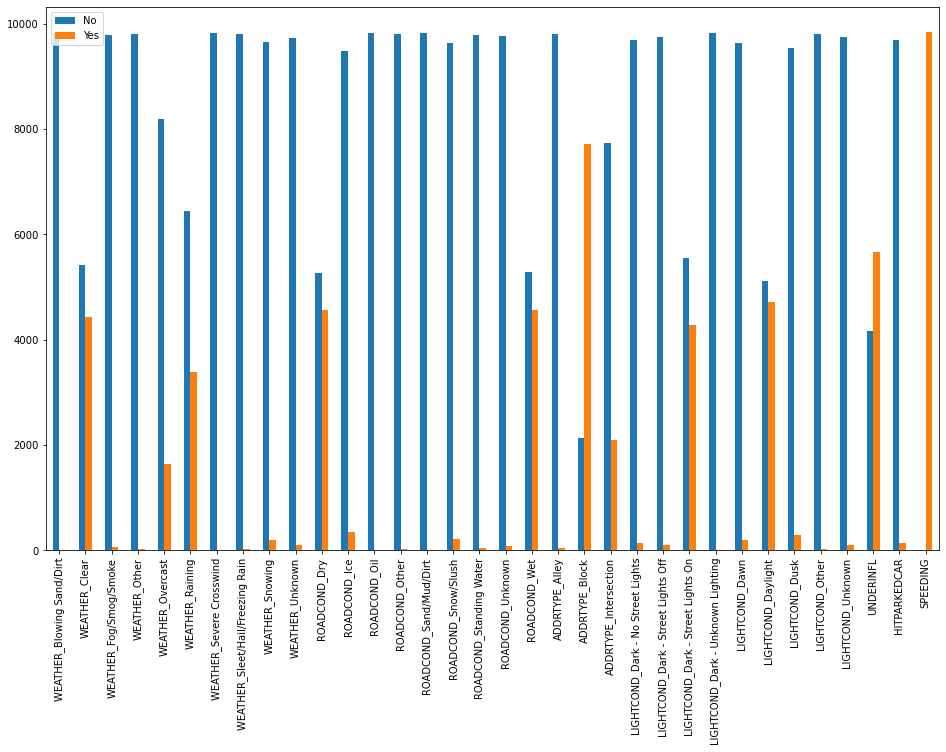

,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Other,WEATHER_Overcast,WEATHER_Raining,WEATHER_Severe Crosswind,WEATHER_Sleet/Hail/Freezing Rain,WEATHER_Snowing,WEATHER_Unknown,ROADCOND_Dry,ROADCOND_Ice,ROADCOND_Oil,ROADCOND_Other,ROADCOND_Sand/Mud/Dirt,ROADCOND_Snow/Slush,ROADCOND_Standing Water,ROADCOND_Unknown,ROADCOND_Wet,ADDRTYPE_Alley,ADDRTYPE_Block,ADDRTYPE_Intersection,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown,UNDERINFL,HITPARKEDCAR,SPEEDING
No,9827.0,5411.0,9779.0,9805.0,8188.0,6447.0,9829.0,9807.0,9643.0,9734.0,5262.0,9478.0,9827.0,9804.0,9818.0,9625.0,9790.0,9758.0,5278.0,9797.0,2127.0,7736.0,9696.0,9737.0,5550.0,9829.0,9630.0,5114.0,9534.0,9809.0,9741.0,4171.0,9696.0,NaN
Yes,3.0,4419.0,51.0,25.0,1642.0,3383.0,1.0,23.0,187.0,96.0,4568.0,352.0,3.0,26.0,12.0,205.0,40.0,72.0,4552.0,33.0,7703.0,2094.0,134.0,93.0,4280.0,1.0,200.0,4716.0,296.0,21.0,89.0,5659.0,134.0,9830.0


In [122]:
import matplotlib.pyplot as plt 

histogram_df = new_df.copy()
histogram_df.columns
hist_cols = ['WEATHER_Blowing Sand/Dirt', 'WEATHER_Clear', 'WEATHER_Fog/Smog/Smoke',
       'WEATHER_Other', 'WEATHER_Overcast', 'WEATHER_Raining',
       'WEATHER_Severe Crosswind', 'WEATHER_Sleet/Hail/Freezing Rain',
       'WEATHER_Snowing', 'WEATHER_Unknown', 'ROADCOND_Dry', 'ROADCOND_Ice',
       'ROADCOND_Oil', 'ROADCOND_Other', 'ROADCOND_Sand/Mud/Dirt',
       'ROADCOND_Snow/Slush', 'ROADCOND_Standing Water', 'ROADCOND_Unknown',
       'ROADCOND_Wet', 'ADDRTYPE_Alley', 'ADDRTYPE_Block',
       'ADDRTYPE_Intersection', 'LIGHTCOND_Dark - No Street Lights',
       'LIGHTCOND_Dark - Street Lights Off',
       'LIGHTCOND_Dark - Street Lights On',
       'LIGHTCOND_Dark - Unknown Lighting', 'LIGHTCOND_Dawn',
       'LIGHTCOND_Daylight', 'LIGHTCOND_Dusk', 'LIGHTCOND_Other',
       'LIGHTCOND_Unknown', 'UNDERINFL', 'HITPARKEDCAR','SPEEDING']

values = []
for col in hist_cols:
    values.append(histogram_df[col].value_counts())
    
values = pd.DataFrame(values)
values.columns = ['No', 'Yes']


values.plot(kind='bar',figsize=(16 ,10))

plt.show()


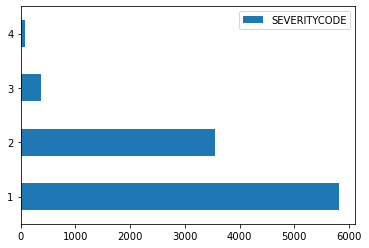

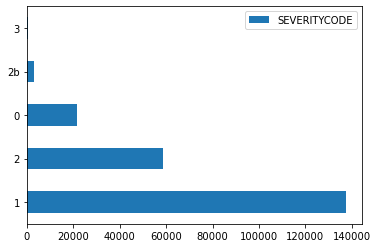

In [62]:
bar = pd.DataFrame(new_df.SEVERITYCODE.value_counts())
bar_1 = pd.DataFrame(df.SEVERITYCODE.value_counts())

bar.plot(kind='barh')
bar_1.plot(kind='barh')
plt.show()



In [63]:
new_df.SEVERITYCODE.value_counts(normalize=True)

1    0.592370
2    0.360631
3    0.037945
4    0.009054
Name: SEVERITYCODE, dtype: float64

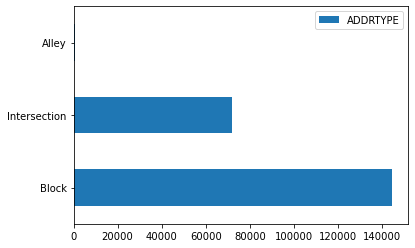

In [64]:

bar2 = pd.DataFrame(df.ADDRTYPE.value_counts())


bar2.plot(kind='barh')
plt.show()



In [ ]:
'ADDRTYPE_Alley', 'ADDRTYPE_Block',
       'ADDRTYPE_Intersection'

# Model production 



# K-Nearest Neighbors (KNN)

In [123]:
dep_var = ['WEATHER_Blowing Sand/Dirt', 'WEATHER_Clear', 'WEATHER_Fog/Smog/Smoke',
       'WEATHER_Other', 'WEATHER_Overcast', 'WEATHER_Raining',
       'WEATHER_Severe Crosswind', 'WEATHER_Sleet/Hail/Freezing Rain',
       'WEATHER_Snowing', 'WEATHER_Unknown', 'ROADCOND_Dry', 'ROADCOND_Ice',
       'ROADCOND_Oil', 'ROADCOND_Other', 'ROADCOND_Sand/Mud/Dirt',
       'ROADCOND_Snow/Slush', 'ROADCOND_Standing Water', 'ROADCOND_Unknown',
       'ROADCOND_Wet', 'LIGHTCOND_Dark - No Street Lights',
       'LIGHTCOND_Dark - Street Lights Off',
       'LIGHTCOND_Dark - Street Lights On',
       'LIGHTCOND_Dark - Unknown Lighting', 'LIGHTCOND_Dawn',
       'LIGHTCOND_Daylight', 'LIGHTCOND_Dusk', 'LIGHTCOND_Other',
       'LIGHTCOND_Unknown', 'UNDERINFL', 'SPEEDING', 'HITPARKEDCAR', 'months',
          'ADDRTYPE_Alley', 'ADDRTYPE_Block',
       'ADDRTYPE_Intersection']
X = new_df[dep_var]
print(X[0:5])

y = new_df['SEVERITYCODE'].values
y[0:5]


   WEATHER_Blowing Sand/Dirt  WEATHER_Clear  WEATHER_Fog/Smog/Smoke  \
0                          0              1                       0   
1                          0              0                       0   
2                          0              0                       0   
3                          0              0                       0   
4                          0              1                       0   

   WEATHER_Other  WEATHER_Overcast  WEATHER_Raining  WEATHER_Severe Crosswind  \
0              0                 0                0                         0   
1              0                 0                1                         0   
2              0                 1                0                         0   
3              0                 1                0                         0   
4              0                 0                0                         0   

   WEATHER_Sleet/Hail/Freezing Rain  WEATHER_Snowing  WEATHER_Unknown  \
0            

array([1, 1, 1, 1, 2])

In [106]:
from sklearn.utils import class_weight 
class_weight = class_weight.compute_class_weight('balanced',
                                                np.unique(y),
                                                y)


In [109]:
class_weight = {1:0.42203332,2:0.6932299,3:6.58847185,4:27.61235955}

In [124]:
# Splitting data into training and test set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 7)
print('Train set shape: ', X_train.shape, y_train.shape)
print('Test set shape: ', X_test.shape, y_test.shape)

Train set shape:  (7864, 35) (7864,)
Test set shape:  (1966, 35) (1966,)


In [125]:
# KNN classification 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics 

Ks = 300 
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for i in range(1,Ks):
    
    # Train model and predict 
    neigh = KNeighborsClassifier(n_neighbors=i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[i-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.53051882, 0.5757884 , 0.54730417, 0.57121058, 0.54781282,
       0.58087487, 0.55391658, 0.58087487, 0.57222787, 0.5757884 ,
       0.56408952, 0.57121058, 0.57171923, 0.5854527 , 0.58646999,
       0.58087487, 0.58087487, 0.57477111, 0.57629705, 0.57985758,
       0.57629705, 0.5757884 , 0.58392675, 0.58341811, 0.58494405,
       0.59155646, 0.58341811, 0.58341811, 0.58901322, 0.58952187,
       0.58748728, 0.58799593, 0.57884028, 0.58290946, 0.5844354 ,
       0.58341811, 0.57985758, 0.5854527 , 0.58748728, 0.58952187,
       0.59155646, 0.58646999, 0.58850458, 0.59766022, 0.59003052,
       0.58748728, 0.58901322, 0.5930824 , 0.59155646, 0.59003052,
       0.59003052, 0.59359105, 0.59003052, 0.59206511, 0.58901322,
       0.5930824 , 0.58138352, 0.58850458, 0.5930824 , 0.58901322,
       0.59053917, 0.58799593, 0.59104781, 0.59053917, 0.58952187,
       0.58799593, 0.5930824 , 0.59053917, 0.58901322, 0.59053917,
       0.59460834, 0.59511699, 0.5854527 , 0.59511699, 0.59206

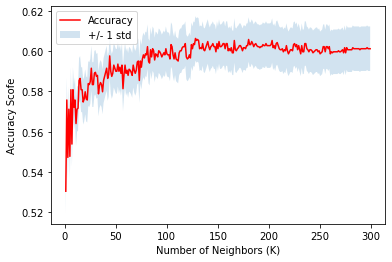

The best accuracy score was  0.6063072227873856  with k=  128


In [126]:
# Plot model accuracy for different number of neighbors
plt.plot(range(1,Ks), mean_acc,'r')
plt.fill_between(range(1,Ks), mean_acc-1*std_acc, mean_acc+1*std_acc, alpha = 0.2)
plt.legend(('Accuracy', '+/- 1 std'))
plt.ylabel('Accuracy Scofe')
plt.xlabel('Number of Neighbors (K)')
plt.show()

print('The best accuracy score was ', mean_acc.max(), ' with k= ', mean_acc.argmax()+1)




# Decision Trees 

In [127]:
from sklearn.tree import DecisionTreeClassifier

In [128]:
accident_tree_val = []
for i in range(1,Ks):
    accident_tree = DecisionTreeClassifier(criterion='entropy', max_depth=1)
    accident_tree.fit(X_train, y_train)
    pred_tree = accident_tree.predict(X_test)
    pt_score = metrics.accuracy_score(y_test, pred_tree)
    accident_tree_val.append(pt_score)

pt_score = max(accident_tree_val)
pt_score

0.6012207527975585

# Logistic Regression

In [129]:
X_logi = np.asarray(new_df[dep_var])
y_logi = np.asarray(new_df['SEVERITYCODE'])

In [130]:
from sklearn import preprocessing
X_logi = preprocessing.StandardScaler().fit(X_logi).transform(X_logi)

In [131]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear')
LR.fit(X_train, y_train)
yhat_logi = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)
logis_score = LR.score(X_test, y_test)
print('Logistic Regression Score: ', logis_score)

Logistic Regression Score:  0.6012207527975585


# ExtraTrees Classifiers

In [132]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier()
et.fit(X_train, y_train)
et_score = et.score(X_test, y_test )
et_score


0.5696846388606307

# Support Vector Machine

In [133]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC 
from sklearn.svm import SVC

one_v_rest = OneVsRestClassifier(LinearSVC(random_state=0)).fit(X_train, y_train)
one_v_rest_score = one_v_rest.score(X_test, y_test)
print("SVM score: ", one_v_rest_score)

/Users/mashewkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/mashewkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/mashewkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


SVM score:  0.603763987792472


/Users/mashewkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Text(0, 0.5, 'Scores')

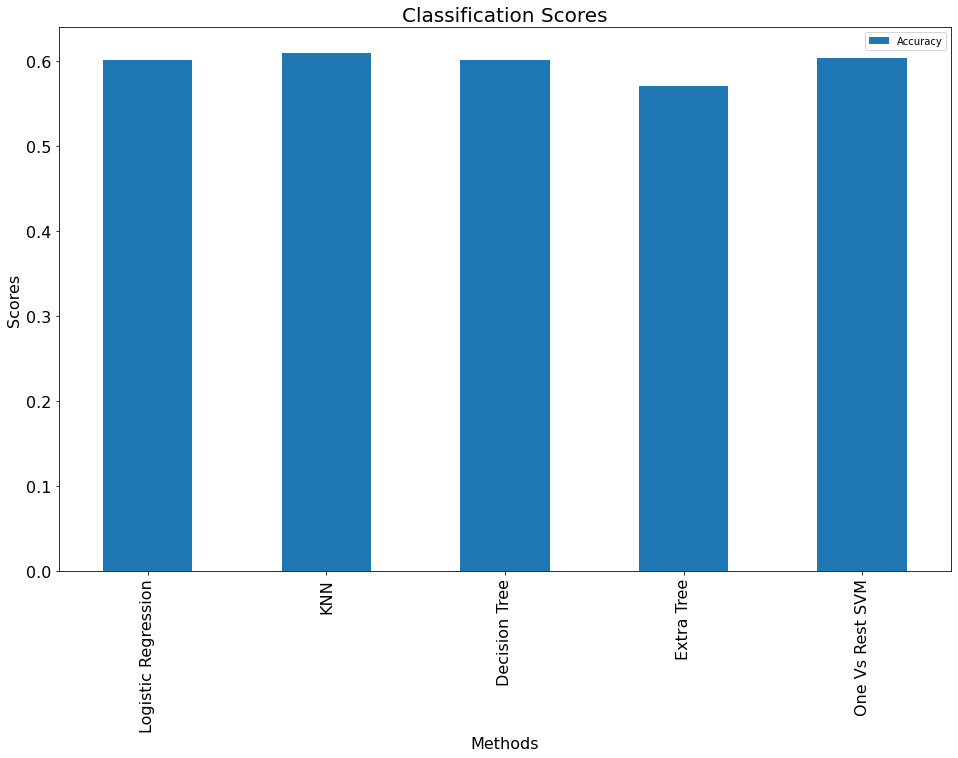

In [135]:
scores = [logis_score, mean_acc.max(), max(accident_tree_val), et_score, one_v_rest_score]
scores = pd.DataFrame(scores, index=['Logistic Regression','KNN','Decision Tree','Extra Tree', 'One Vs Rest SVM'])
scores.columns = ['Accuracy']


scores.plot(kind='bar', figsize=(16,10), fontsize = 16)

plt.title('Classification Scores', fontsize = 20)
plt.xlabel('Methods', fontsize= 16)
plt.ylabel('Scores', fontsize = 16)

# Fine tuning the model 

In [144]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Different Logistic Regression hyperparameters 
log_reg_grid = {'C': np.logspace(-4,4,20),
               'solver': ['liblinear']}

# Different SVM hyperparameters 
SVM_grid = {'C': [0.1,1,10,100,1000],
           'gamma': [1,0.1,0.01,0.001,0.0001]}


In [145]:
# Setup random seed 
np.random.seed(7)

# Setup random hyperparameter search for Logistic Regression 
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# Fit random hyperparameter search model 
rs_log_reg.fit(X_train, y_train)

grid = GridSearchCV(SVC(), SVM_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)



Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   10.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.591, total=   2.3s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.590, total=   2.2s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.4s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.590, total=   2.1s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.590, total=   2.3s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.590, total=   2.4s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.591, total=   2.2s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.590, total=   2.2s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.590, total=   2.3s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.590, total=   2.3s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .

[CV] .................... C=10, gamma=0.01, score=0.591, total=   3.5s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=0.590, total=   3.4s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=0.590, total=   3.7s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=0.590, total=   3.5s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=0.590, total=   3.5s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.591, total=   2.3s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.590, total=   2.4s
[CV] C=10, gamma=0.001 ...............................................
[CV] .

[CV] ................. C=1000, gamma=0.001, score=0.590, total=  34.5s
[CV] C=1000, gamma=0.001 .............................................
[CV] ................. C=1000, gamma=0.001, score=0.590, total=  32.7s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.591, total=   6.8s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.590, total=   6.5s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.590, total=   7.9s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.590, total=   7.4s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.590, total=   6.2s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed: 29.1min finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [58]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.08858667904100823}

In [60]:
rs_log_reg.score(X_test, y_test)

0.603763987792472

In [146]:
grid.best_params_

{'C': 0.1, 'gamma': 1}

In [147]:
grid.score(X_test, y_test)

0.6012207527975585

In [77]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.08858667904100823}

In [78]:
from sklearn.model_selection import cross_val_score 

clf = LogisticRegression(C=0.08858667904100823,
                        solver='liblinear')

In [79]:
cv_acc = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring='accuracy')
cv_acc

array([0.58494405, 0.59257375, 0.59155646, 0.59613428, 0.60020346])

In [80]:
cv_acc = np.mean(cv_acc)
cv_acc

0.5930824008138351

In [ ]:
import folium 
map_df = df[['X','Y']]
map_df = map_df.dropna()


In [ ]:
lat = df.X[0]
long = df.Y[0]
m = folium.Map(location = [long,lat])

for i in range(0, 400):
    folium.Circle(
    location=[map_df.iloc[i]['X'], map_df.iloc[i]['Y']],
    color='crimson',
    fill=True).add_to(m)

In [ ]:
m